In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/ICU')

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from neural_network_decision_tree import nn_decision_tree
import pandas as pd

In [3]:
np.random.seed(1943)
tf.random.set_seed(1943)

In [4]:
dataset = pd.read_excel('Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

In [5]:
age = pd.get_dummies(dataset['AGE_PERCENTIL'],drop_first=True)
window = pd.get_dummies(dataset['WINDOW'],drop_first=True)
dataset.drop(['AGE_PERCENTIL','WINDOW'],axis=1,inplace=True)
dataset = pd.concat([dataset,age,window],axis=1)

In [6]:
dl = int(len(dataset)/5)
cl = int(len(dataset.columns))

In [7]:
for i in range(dl):
  for j in range(cl):
    mean = dataset.iloc[i*5:((i+1)*5),j].mean()
    for k,l in enumerate(dataset.iloc[i*5:((i+1)*5),j].isnull()):
      if l == True:
        dataset.loc[i*5:(i+1)*5,dataset.columns[j]].values[k] = mean

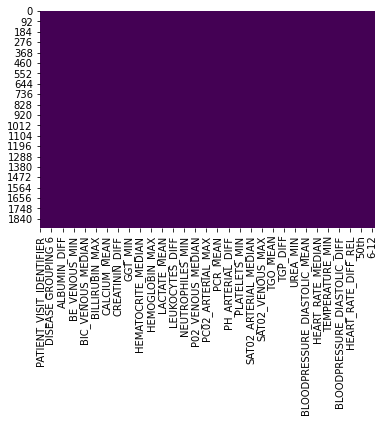

In [8]:
import seaborn as sns

sns.heatmap(dataset.isnull(), cbar=False, cmap ='viridis')

In [9]:
x = dataset.iloc[:, 3:9] # use "Petal length" and "Petal width" only
y = dataset["ICU"]
d = x.shape[1]

In [11]:
num_cut = [1, 1, 1, 1, 1, 1 ]  # "Petal length" and "Petal width"
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = 3

In [13]:
sess = tf.compat.v1.InteractiveSession()

In [ ]:
x_ph = tf.compat.v1.placeholder(tf.float32, [None, d])
y_ph = tf.compat.v1.placeholder(tf.float32, [None, num_class])

In [18]:
cut_points_list = [tf.Variable(tf.random.uniform([i])) for i in num_cut]
leaf_score = tf.Variable(tf.random.uniform([num_leaf, num_class]))

In [ ]:
y_pred = nn_decision_tree(x_ph, cut_points_list, leaf_score, temperature=0.1)
loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(logits=y_pred, onehot_labels=y_ph))

In [ ]:
opt = tf.train.AdamOptimizer(0.1)
train_step = opt.minimize(loss)

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
for i in range(1000):
    _, loss_e = sess.run([train_step, loss], feed_dict={x_ph: x, y_ph: y})
    if i % 200 == 0:
        print(loss_e)
print('error rate %.2f' % (1 - np.mean(np.argmax(y_pred.eval(feed_dict={x_ph: x}), axis=1) == np.argmax(y, axis=1))))